# Final Project
## Dataset:
https://archive.ics.uci.edu/ml/datasets/adult  
Classifying: >50K, <=50K.  

**age:** continuous.  
**workclass:** Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.  
**fnlwgt:** continuous.  
**education:** Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.  
**education-num:** continuous.  
**marital-status:** Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.  
**occupation:** Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.  
**relationship:** Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.  
**race:** White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.  
**sex:** Female, Male.  
**capital-gain:** continuous.  
**capital-loss:** continuous.  
**hours-per-week:** continuous.  
**native-country:** United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [50]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics, model_selection, linear_model, feature_selection, preprocessing
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
data = pd.read_csv("adult.csv")
display(data.head())
np.shape(data)[0]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


48842

## Data Cleaning and EDA

In [123]:
old_value_instances = data.apply(lambda x : dict(x.value_counts()))

In [52]:
data.columns = data.columns.str.strip()
data = data.apply(lambda x : x.astype(str).str.strip(' .') if not pd.api.types.is_int64_dtype(x) else x)

In [55]:
# Count number of instances of missing values
data.loc[:, (data == '?').any()].apply(lambda x : x.value_counts()).head()

,workclass,occupation,native-country
?,2799.0,2809.0,857.0
Adm-clerical,NaN,5611.0,NaN
Armed-Forces,NaN,15.0,NaN
Cambodia,NaN,NaN,28.0
Canada,NaN,NaN,182.0


In [56]:
# drop rows with missing values
data = data.replace('?', np.nan).dropna()
display(data.head())
np.shape(data)[0]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


45222

In [57]:
income_count = pd.pivot_table(data, values='workclass', index='income', aggfunc='count')
income_count.rename(columns={'workclass':'count'}, inplace=True)
fig = px.bar(income_count, y='count', title='Count of Each Income Group')
fig.show()

From the original dataset, we can see that there is a significant class imbalance. There are much more instances for the majority class, people whose income is less than 50K, than for the minority class, people whose income is more than 50K. Using a dataset with imbalanced classes may result in lower accuracy.

In [58]:
data['income-binary'] = pd.get_dummies(data['income'])['>50K']
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income-binary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0


get_dummies() will represent instances with income <=50K as 0 and instances with income >50K as 1.

In [59]:
minority_class_instances = data[data['income-binary'] == 1]
minority_class_size = data['income-binary'].value_counts()[1]
majority_class_size = data['income-binary'].value_counts()[0]
num_dup = majority_class_size - minority_class_size
duplicates_df = minority_class_instances.sample(n=num_dup, replace=True)
balanced_df = pd.concat([data, duplicates_df], ignore_index=True)

Therefore, we can use random duplication of instances in the minority class to make both classes have the same number of instances in our new balanced dataset. This allows us to make the comparison later as to whether using the original dataset or the balanced dataset results in better accuracy for our models.

In [60]:
new_income_count = pd.pivot_table(balanced_df, values='workclass', index='income', aggfunc='count')
new_income_count.rename(columns={'workclass':'count'}, inplace=True)
fig = px.bar(new_income_count, y='count', title='Count of Each Income Group (after balancing)')
fig.show()

### Pruning and Correlation Analysis

In [61]:
xtrain_edu, xtest_edu, ytrain_edu, ytest_edu = model_selection.train_test_split(np.array(balanced_df['education-num']), 
                                                                                 np.array(balanced_df['education']),
                                                                                 test_size=0.2,
                                                                                 random_state=0)
bxtrain_edu, bxtest_edu, bytrain_edu, bytest_edu = model_selection.train_test_split(np.array(balanced_df['education-num']), 
                                                                                 np.array(balanced_df['education']),
                                                                                 test_size=0.2,
                                                                                 random_state=0)

In [62]:
# https://medium.com/@outside2SDs/an-overview-of-correlation-measures-between-categorical-and-continuous-variables-4c7f85610365
clf_edu = linear_model.LogisticRegression(solver='newton-cg').fit(xtrain_edu.reshape(-1, 1), ytrain_edu)
bclf_edu = linear_model.LogisticRegression(solver='newton-cg').fit(bxtrain_edu.reshape(-1, 1), bytrain_edu)

In [63]:
predict_edu = clf_edu.predict(xtest_edu.reshape(-1, 1))
print(f"Test: {predict_edu}\nPrediction: {ytest_edu}\n")
print(f"Accuracy: {metrics.accuracy_score(ytest_edu, predict_edu)}")
print(f"Precision: {metrics.precision_score(ytest_edu, predict_edu, average='macro')}")
print(f"Recall: {metrics.recall_score(ytest_edu, predict_edu, average='macro')}")
# print(f"F1: {metrics.f1_score(ytest_edu, predict_edu, average='macro')}")

Test: ['Some-college' 'Bachelors' 'Some-college' ... 'HS-grad' 'Doctorate' '9th']
Prediction: ['Some-college' 'Bachelors' 'Some-college' ... 'HS-grad' 'Doctorate' '9th']

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [127]:
bpredict_edu = bclf_edu.predict(bxtest_edu.reshape(-1, 1))
print(f"Balanced Test: {bpredict_edu}\nPrediction: {bytest_edu}\n")
print(f"Balanced Accuracy: {metrics.accuracy_score(bytest_edu, bpredict_edu)}")
print(f"Balanced Precision: {metrics.precision_score(bytest_edu, bpredict_edu, average='macro')}")
print(f"Balanced Recall: {metrics.recall_score(bytest_edu, bpredict_edu, average='macro')}")
# print(f"F1: {metrics.f1_score(ytest_edu, predict_edu, average='macro')}")

Balanced Test: ['Some-college' 'Bachelors' 'Some-college' ... 'HS-grad' 'Doctorate' '9th']
Prediction: ['Some-college' 'Bachelors' 'Some-college' ... 'HS-grad' 'Doctorate' '9th']

Balanced Accuracy: 1.0
Balanced Precision: 1.0
Balanced Recall: 1.0


**Logistic Regression Analyzing Correlation**
* We are trying to determine if `education` and `education-num` are actually correlated and if we can ignore one of them when performing building our models and visualizations. Although based on column names, it's highly likely they are related, we wish to confirm this with correlation analysis. 
* Since `education` is categorical and `education-num` is continuous, we cannot perform Pearson's Correlation or Chi2. Instead, we can utilize *Logistic Regression* to see if the two features are correlated. The `newton-cg` sovler is used as it's the one that best matches our dataset given our sample size and values. We will train this model with `education-num` to classify they're `education`. We'll train it on 80% of the data and test it with the remaining 20%. If the resulting `accuracy`, `precision`, and `recall` is extremely high, we can conclude that `education` and `education-num` are correlated.

*Result:*  
* Accuracy: `1.0`, Balanced = `1.0`
* Precision: `1.0`, Balanced = `1.0`
* Recall: `1.0`, Balanced = `1.0`
* Given that the model was able to predict the test set's `education` with 100% accuracy, we can conclude that our `X` values can accurately classify the values; however, if it's heavily unbalanced, this will be guaranteed near 100%. Precision and recall can be useful as they tell us how relevant our features are at classifying. Given that both of these are `1.0`, we can also determine that our precision-recall is perfect, and that all the features utilized are extremely important in the logistic regression. Moreoever, combining each of these three metrics, it tells us that each of the values in `education-num` is directly translate to a specific value in `education`, i.e. `13` => `Bachelors`. Although with the visible eye, this could seem obvious, this logistic regrssion and the combination of these metrics confirms this hypothesis with all of the values in the dataset. Therefore, we can confirm that `education` and `education-num` are correlated; however, since this value will be important for our kNN model, we will not prune it, rather we will simply ignore it in other usages. The same result can be found with the balanced dataset.

In [16]:
display(pd.crosstab(data['marital-status'], data['relationship']))
chi2_mr, p_mr, df_mr, expected_mr = stats.chi2_contingency(pd.crosstab(data['marital-status'], data['relationship']))

relationship,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
marital-status,,,,,,
Divorced,0,3435,166,429,2267,0
Married-AF-spouse,11,0,1,1,0,19
Married-civ-spouse,18655,19,184,125,0,2072
Married-spouse-absent,0,282,44,57,169,0
Never-married,0,6691,820,5864,1223,0
Separated,0,588,75,130,618,0
Widowed,0,687,59,20,511,0


Chi2 Value: 53655.73391361823


In [65]:
display(pd.crosstab(balanced_df['marital-status'], balanced_df['relationship']))
bchi2_mr, bp_mr, bdf_mr, bexpected_mr = stats.chi2_contingency(pd.crosstab(balanced_df['marital-status'], balanced_df['relationship']))

relationship,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
marital-status,,,,,,
Divorced,0,4350,173,456,2635,0
Married-AF-spouse,20,0,1,1,0,46
Married-civ-spouse,35945,30,241,177,0,4147
Married-spouse-absent,0,362,48,66,191,0
Never-married,0,7905,839,5991,1283,0
Separated,0,741,78,130,670,0
Widowed,0,824,61,22,595,0


In [66]:
print(f"Chi2 Value: {chi2_mr}, Balanced = {bchi2_mr}")

Chi2 Value: 53655.73391361823, Balanced = 80494.78403003045


**Chi Square for Pruning**  
* Null Hypothesis: `marital-status` and `relationship` are not correlated
* Significance Level: `0.05`
* DoF: (7-1)(6-1) = `30`
* Critical Value: `43.77`  

*Result:*  
* Chi2 Value: `58195.24158415406`, Balanced = `80494.78403003045`
* In order to fail to reject the null hypothesis, we need our Chi2 Value to be less than `43.77`. However, after performing Chi2 analysis, we get `58195.24158415406`, which is much larger than the `43.77`. This means that we **reject our null hypothesis** that `marital-status` and `relationship` are most definitely correlated, and we can prune one of the features. Likewise, `80494.78403003045` is much greater than the Critical Value, which means they are still not correlated.

In [67]:
# dropping redundant features
data = data.drop(columns=['relationship'])
balanced_df = balanced_df.drop(columns=['relationship'])

In [68]:
value_instances = data.apply(lambda x : dict(x.value_counts()))
bvalue_instances = balanced_df.apply(lambda x : dict(x.value_counts()))

**Correlation Between Other Numerical Data**

In [69]:
# Split data between categorical and numerical data
num_data = data.loc[:, data.dtypes == 'int64']
bnum_data = balanced_df.loc[:, data.dtypes == 'int64']

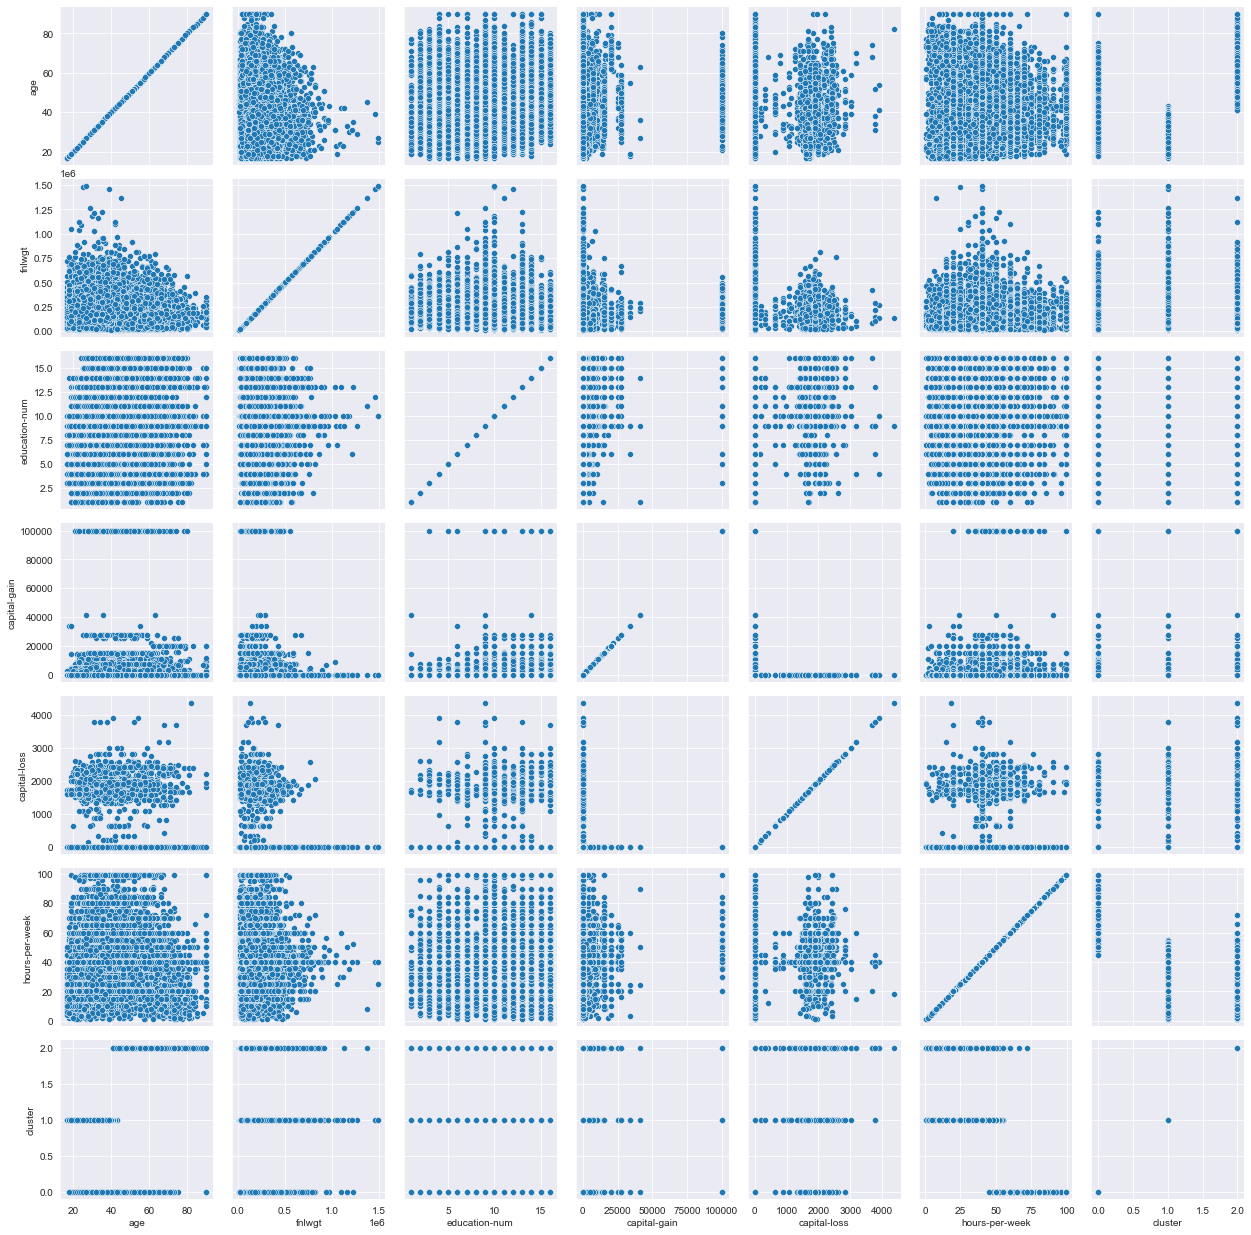

In [111]:
fs_pgplot = sns.PairGrid(data.drop(columns='income-binary'))
fs_pgplot.map(sns.scatterplot)

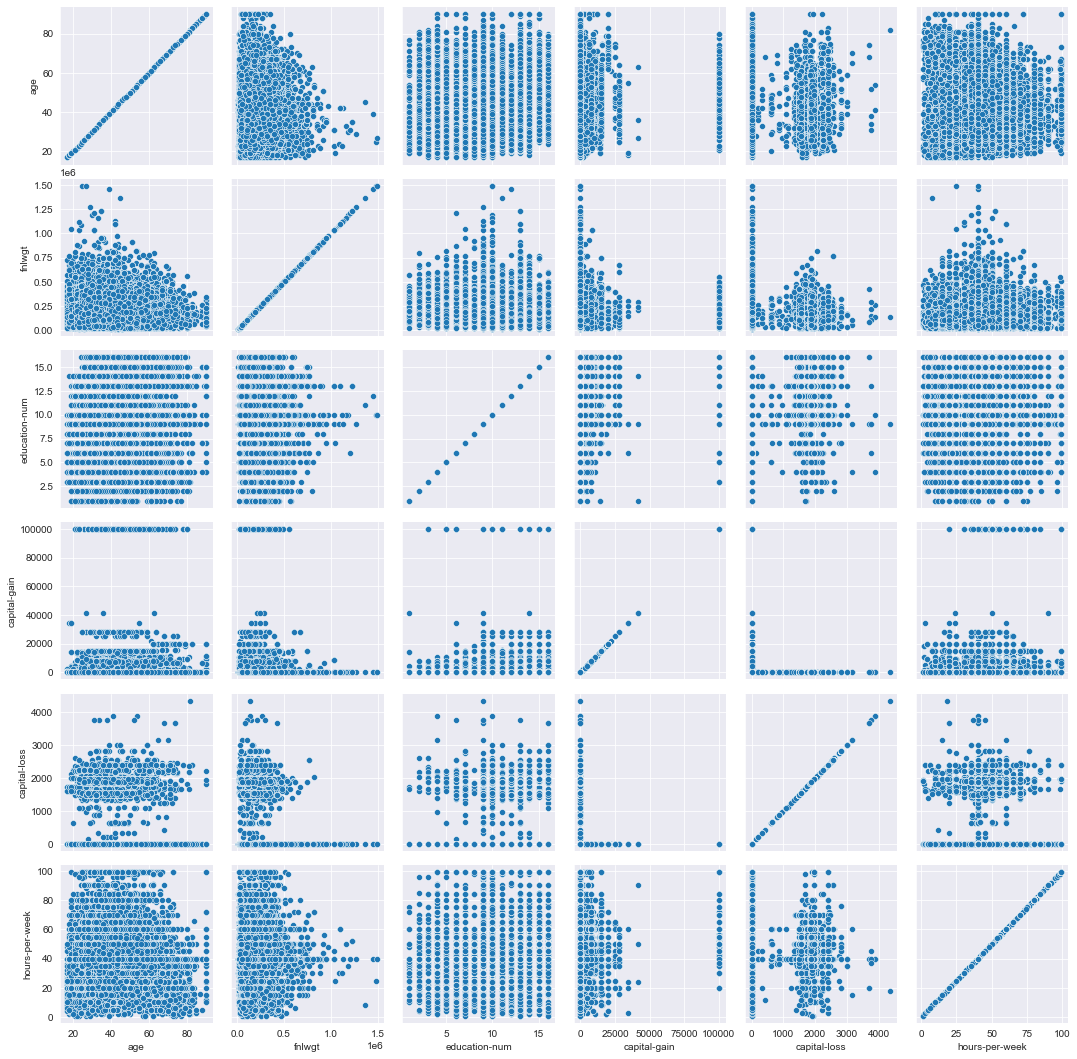

In [114]:
fs_pgplot = sns.PairGrid(balanced_df.drop(columns='income-binary'))
fs_pgplot.map(sns.scatterplot)

In [20]:
num_data.corr(method='pearson')

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.075792,0.037623,0.079683,0.059351,0.101992
fnlwgt,-0.075792,1.000000,-0.041993,-0.004110,-0.004349,-0.018679
education-num,0.037623,-0.041993,1.000000,0.126907,0.081711,0.146206
capital-gain,0.079683,-0.004110,0.126907,1.000000,-0.032102,0.083880
capital-loss,0.059351,-0.004349,0.081711,-0.032102,1.000000,0.054195
hours-per-week,0.101992,-0.018679,0.146206,0.083880,0.054195,1.000000


In [72]:
bnum_data.corr(method='pearson')

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.074111,0.076000,0.087612,0.056458,0.083510
fnlwgt,-0.074111,1.000000,-0.023424,-0.004977,-0.001288,-0.012969
education-num,0.076000,-0.023424,1.000000,0.148079,0.097443,0.162875
capital-gain,0.087612,-0.004977,0.148079,1.000000,-0.050917,0.093640
capital-loss,0.056458,-0.001288,0.097443,-0.050917,1.000000,0.063147
hours-per-week,0.083510,-0.012969,0.162875,0.093640,0.063147,1.000000


To see if there is any other correlations between the numerical data, we plotted each numerical feature against each other in a scatter plot to observe any potential correlations. To pair each feature together, `PairGrid` was used with each pair placed in a scatter plot. By looking at the graph, we can see that all the scatter plots show little to no correlation (ignoring the diagonal, which pairs a feature against itself). To confirm the actual values, we also ran Pearson Correlation on each of the pairs and displayed the results in the above matrix. Again, we can see for each pair that there is little to almost no correlation between the two features, with the highest coefficient value in the entire matrix being `0.146206` between `hours-per-week` and `education-num`. With this, we can conclude that none of the *numerical* features are correlated to each other, and that each of these features are relevant. This is the same with the balanced dataset where the highest coefficient is `0.162875`, which is still significantly low.

### EDA

#### Spider Plot Visualization
US vs Non-US in race, education, and marital status 

In [21]:
#comparing united states race vs race of other countries
race_categories = pd.crosstab(data['race'], data['native-country'])
race_categories

native-country,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
race,,,,,,,,,,,,,,,,,,,,,
Amer-Indian-Eskimo,0,0,0,1,0,0,0,0,0,0,...,0,1,0,2,0,0,0,417,0,0
Asian-Pac-Islander,23,1,110,0,0,1,0,0,2,1,...,1,1,0,98,52,24,4,398,81,0
Black,1,0,0,0,4,18,1,1,8,1,...,0,13,1,0,0,1,20,3962,0,0
Other,0,2,0,8,3,21,12,8,1,1,...,1,28,0,0,0,0,1,168,0,0
White,2,160,3,73,126,57,30,138,108,33,...,60,132,19,1,3,4,1,36347,2,23


In [73]:
#comparing united states race vs race of other countries
brace_categories = pd.crosstab(balanced_df['race'], balanced_df['native-country'])
brace_categories

native-country,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
race,,,,,,,,,,,,,,,,,,,,,
Amer-Indian-Eskimo,0,0,0,1,0,0,0,0,0,0,...,0,1,0,2,0,0,0,516,0,0
Asian-Pac-Islander,45,4,171,0,0,1,0,0,2,1,...,1,1,0,122,95,31,4,623,91,0
Black,1,0,0,0,5,23,1,1,13,1,...,0,19,1,0,0,1,23,4982,0,0
Other,0,2,0,8,3,21,12,8,2,2,...,1,30,0,0,0,0,1,212,0,0
White,2,290,5,82,191,69,41,166,213,62,...,84,161,24,1,10,6,1,56241,2,39


##### Race in United-States vs Non United-States

In [74]:
#table of race with columns united states vs other
race_categories = pd.crosstab(data['race'], data['native-country'] != 'United-States', normalize = 'index')
race_categories = race_categories.rename(columns = {'False' : 'United-States'})
race_categories = race_categories.rename(columns={0: 'United-States', 1: 'Non United-States'})
race_categories

native-country,United-States,Non United-States
race,,
Amer-Indian-Eskimo,0.958621,0.041379
Asian-Pac-Islander,0.305449,0.694551
Black,0.937086,0.062914
Other,0.475921,0.524079
White,0.934298,0.065702


In [75]:
#table of race with columns united states vs other
brace_categories = pd.crosstab(balanced_df['race'], balanced_df['native-country'] != 'United-States', normalize = 'index')
brace_categories = brace_categories.rename(columns = {'False' : 'United-States'})
brace_categories = brace_categories.rename(columns={0: 'United-States', 1: 'Non United-States'})
brace_categories

native-country,United-States,Non United-States
race,,
Amer-Indian-Eskimo,0.966292,0.033708
Asian-Pac-Islander,0.305842,0.694158
Black,0.937700,0.062300
Other,0.491879,0.508121
White,0.941855,0.058145


In [78]:
# Imbalanced
spider_graph = go.Figure()
spider_graph.add_trace(go.Scatterpolar(
                    r = race_categories['United-States'],
                    theta = ['Amer-Indian-Eskimo','Asian-Pac-Islander','Black' ,'Other', 'White'],
                    fill = 'toself',
                    name = 'United-States'
))

spider_graph.add_trace(go.Scatterpolar(
                    r = race_categories['Non United-States'],
                    theta = ['Amer-Indian-Eskimo','Asian-Pac-Islander','Black' ,'Other', 'White'],
                    fill = 'toself',
                    name = 'Non United-States'
))


spider_graph.update_layout(
            polar=dict(
            radialaxis=dict(
                visible = True,
                range = [0, 1]
            ),
            ),
    title_text = 'Race in United-States vs Non United-States',
    showlegend = True
)

# Balanced
bspider_graph = go.Figure()
bspider_graph.add_trace(go.Scatterpolar(
                    r = brace_categories['United-States'],
                    theta = ['Amer-Indian-Eskimo','Asian-Pac-Islander','Black' ,'Other', 'White'],
                    fill = 'toself',
                    name = 'United-States'
))

bspider_graph.add_trace(go.Scatterpolar(
                    r = brace_categories['Non United-States'],
                    theta = ['Amer-Indian-Eskimo','Asian-Pac-Islander','Black' ,'Other', 'White'],
                    fill = 'toself',
                    name = 'Non United-States'
))


bspider_graph.update_layout(
            polar=dict(
            radialaxis=dict(
                visible = True,
                range = [0, 1]
            ),
            ),
    title_text = '(Balanced) Race in United-States vs Non United-States',
    showlegend = True
)

# Show Plots
spider_graph.show()
bspider_graph.show()

#### Explanation:
In this dataset, it can been seen that there are large differences in the sizes of racial groups between United-States and all non United-States countries combined. It is shown that there are three racial groups, which are Amer-Indian-Eskimo, Black, and White, that are the predominant racial groups in the United-States, as compared to other countries. However, it can be seen that for non United-States countries that the 'other' racial group and Asian-Pac-Islander are the largest groups in non United-States.

##### Education in United States vs Non United States

In [24]:
education_categories  = pd.crosstab(data['education'], data['native-country'] != 'United-States',normalize = 'index')
education_categories= education_categories.rename(columns = {'False' : 'United-States'})
education_categories = education_categories.rename(columns={0: 'United-States', 1: 'Non United-States'})
education_categories

native-country,United-States,Non United-States
education,,
10th,0.914146,0.085854
11th,0.918468,0.081532
12th,0.875217,0.124783
1st-4th,0.234234,0.765766
5th-6th,0.296214,0.703786
7th-8th,0.786148,0.213852
9th,0.778107,0.221893
Assoc-acdm,0.931652,0.068348
Assoc-voc,0.941297,0.058703


In [79]:
beducation_categories  = pd.crosstab(balanced_df['education'], balanced_df['native-country'] != 'United-States',normalize = 'index')
beducation_categories= beducation_categories.rename(columns = {'False' : 'United-States'})
beducation_categories = beducation_categories.rename(columns={0: 'United-States', 1: 'Non United-States'})
beducation_categories

native-country,United-States,Non United-States
education,,
10th,0.920086,0.079914
11th,0.922655,0.077345
12th,0.878561,0.121439
1st-4th,0.236515,0.763485
5th-6th,0.287474,0.712526
7th-8th,0.788462,0.211538
9th,0.789333,0.210667
Assoc-acdm,0.939869,0.060131
Assoc-voc,0.937206,0.062794


In [80]:
# Imbalanced
spider_graph = go.Figure()
spider_graph.add_trace(go.Scatterpolar(
                    r = education_categories['United-States'],
                    theta = ['10th', '11th','12th', '1st-4th','5th-6th','7th-8th', '9th','Assoc-acdm','Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad',
                             'Masters', 'Preschool' , 'Prof-school', 'Some-college'],
                    fill = 'toself',
                    name = 'United-States'
))

spider_graph.add_trace(go.Scatterpolar(
                    r = education_categories['Non United-States'],
                    theta = ['10th', '11th','12th', '1st-4th','5th-6th','7th-8th', '9th','Assoc-acdm','Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad',
                             'Masters', 'Preschool' , 'Prof-school', 'Some-college'],
                    fill = 'toself',
                    name = 'Non United-States'
))


spider_graph.update_layout(
            polar=dict(
            radialaxis=dict(
                visible = True,
                range = [0, 1]
            ),
            ),
    title_text = 'Education in United-States vs Non United-States',
    showlegend = True
)

# Balanced
bspider_graph = go.Figure()
bspider_graph.add_trace(go.Scatterpolar(
                    r = beducation_categories['United-States'],
                    theta = ['10th', '11th','12th', '1st-4th','5th-6th','7th-8th', '9th','Assoc-acdm','Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad',
                             'Masters', 'Preschool' , 'Prof-school', 'Some-college'],
                    fill = 'toself',
                    name = 'United-States'
))

bspider_graph.add_trace(go.Scatterpolar(
                    r = beducation_categories['Non United-States'],
                    theta = ['10th', '11th','12th', '1st-4th','5th-6th','7th-8th', '9th','Assoc-acdm','Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad',
                             'Masters', 'Preschool' , 'Prof-school', 'Some-college'],
                    fill = 'toself',
                    name = 'Non United-States'
))


bspider_graph.update_layout(
            polar=dict(
            radialaxis=dict(
                visible = True,
                range = [0, 1]
            ),
            ),
    title_text = '(Balanced) Education in United-States vs Non United-States',
    showlegend = True
)

spider_graph.show()
bspider_graph.show()

##### Explanation:
It can be seen that education for United-States is higher than Non United-States countries. Regarding United-States, a citizen tends to have at minimum a  7-8th grade education, and frequently has a college level education. In comparison to Non United-States countries, the most common level of education is either preschool or 5th-6th grade, with few going beyond.




##### Marital-status in United-States vs Non United-States


In [26]:
marital_categories = pd.crosstab(data['marital-status'], data['native-country'] != 'United-States',normalize = 'index')
marital_categories= marital_categories.rename(columns = {'False' : 'United-States'})
marital_categories = marital_categories.rename(columns={0: 'United-States', 1: 'Non United-States'})
marital_categories

native-country,United-States,Non United-States
marital-status,,
Divorced,0.946959,0.053041
Married-AF-spouse,0.968750,0.031250
Married-civ-spouse,0.910330,0.089670
Married-spouse-absent,0.655797,0.344203
Never-married,0.914509,0.085491
Separated,0.884479,0.115521
Widowed,0.916993,0.083007


In [82]:
bmarital_categories = pd.crosstab(balanced_df['marital-status'], balanced_df['native-country'] != 'United-States',normalize = 'index')
bmarital_categories= bmarital_categories.rename(columns = {'False' : 'United-States'})
bmarital_categories = bmarital_categories.rename(columns={0: 'United-States', 1: 'Non United-States'})
bmarital_categories

native-country,United-States,Non United-States
marital-status,,
Divorced,0.945101,0.054899
Married-AF-spouse,0.941176,0.058824
Married-civ-spouse,0.921633,0.078367
Married-spouse-absent,0.670165,0.329835
Never-married,0.916594,0.083406
Separated,0.888820,0.111180
Widowed,0.920772,0.079228


In [83]:
# Imbalance
spider_graph = go.Figure()
spider_graph.add_trace(go.Scatterpolar(
                    r = marital_categories['United-States'],
                    theta = ['Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent', 'Never-married', 'Separated',' Widowed' ],
                    fill = 'toself',
                    name = 'United-States'
))

spider_graph.add_trace(go.Scatterpolar(
                    r = marital_categories['Non United-States'],
                    theta = ['Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent', 'Never-married', 'Separated',' Widowed' ],
                    fill = 'toself',
                    name = 'Non United-States'
))


spider_graph.update_layout(
            polar=dict(
            radialaxis=dict(
                visible = True,
                range = [0, 1]
            ),
            ),
    title_text = 'Marital-status in United-States vs Non United-States',
    showlegend = True
)

# Balanced
bspider_graph = go.Figure()
bspider_graph.add_trace(go.Scatterpolar(
                    r = bmarital_categories['United-States'],
                    theta = ['Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent', 'Never-married', 'Separated',' Widowed' ],
                    fill = 'toself',
                    name = 'United-States'
))

bspider_graph.add_trace(go.Scatterpolar(
                    r = bmarital_categories['Non United-States'],
                    theta = ['Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent', 'Never-married', 'Separated',' Widowed' ],
                    fill = 'toself',
                    name = 'Non United-States'
))


bspider_graph.update_layout(
            polar=dict(
            radialaxis=dict(
                visible = True,
                range = [0, 1]
            ),
            ),
    title_text = '(Balanced) Marital-status in United-States vs Non United-States',
    showlegend = True
)

spider_graph.show()
bspider_graph.show()

##### Explanation:
Here we have the Marital status between United-States and Non United-States countries. United-States dominates the graph due to having a huge amount of people, either married or not married. Whereas for Non United-States countries, there is a lower amount of people in general, either married or not married.


#### Bubble Chart Visualization
size of bubble: avg hours, axis: edu-num, age, occupation

In [99]:
fig = px.scatter((data.groupby('workclass').mean().reset_index()), x='education-num', y='age', size='hours-per-week', color='workclass')
bfig = px.scatter((balanced_df.groupby('workclass').mean().reset_index()), x='education-num', y='age', size='hours-per-week', color='workclass')
fig.show()
bfig.show()

Using a bubble chart with our original dataset, we see that generally as age rises, so does the amount of education for each individual. Self-employed and governmental jobs seem to require more education and higher age, while Private has younger people with slightly less education. People without pay seem to very less education. The bubble sizes are approximately the same as the average for most jobs is at 40 hours per week. When using the same graph with the balanced set, we find that our bubbles and relative positioning has not changed much. This is because despite doing minority balances, the means remain the same for the attributes.

#### Heatmap Visualization
marital-status, occupation

In [86]:
occupation_race_ct = pd.crosstab(data['marital-status'], data['occupation'])
boccupation_race_ct = pd.crosstab(balanced_df['marital-status'], balanced_df['occupation'])

bfig = px.imshow(boccupation_race_ct)
fig = px.imshow(occupation_race_ct)

fig.show()
bfig.show()

Based on this heatmap, we can see that the dataset is not very even in terms of the number of instances for each type of marital status or with each type of occupation. We can tell that the groups with the most number of instances are people who are married-civ-spouse with an occupation of craft-repair then followed by people who are married-civ-spouse with an occupation of exec-managerial. However, we can also see that in general, there are more people in the category married-civ-spouse than in the other categories for marital status.

#### Violinplot Visualization
group by sex, distribution of hours per week

Text(0.5, 1.0, 'Distribution of Hours Per Week By Sex')

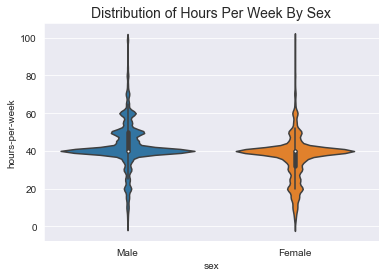

In [88]:
Distribution = sns.violinplot(data=data, x="sex", y="hours-per-week")
sns.set_style("darkgrid")
Distribution.set_title('Distribution of Hours Per Week By Sex', fontsize=14)

Text(0.5, 1.0, '(Balanced) Distribution of Hours Per Week By Sex')

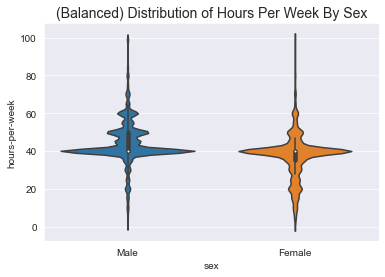

In [89]:
bDistribution = sns.violinplot(data=balanced_df, x="sex", y="hours-per-week")
sns.set_style("darkgrid")
bDistribution.set_title('(Balanced) Distribution of Hours Per Week By Sex', fontsize=14)

#### Explanation:
In regards to genders, both seem to have the same distribution for hours per week which is around 40 hours per week. The median for males is lower than the median for females. However, it can be seen that a majority of females work less than 40 hours per week as compared to males. A majority of males tend to work at or more than 40 hours per week compared to females.

### Kmeans

#### Original Graph

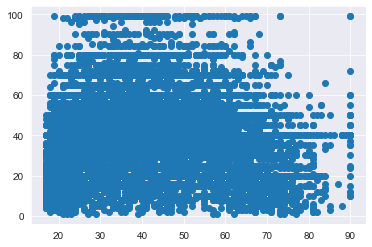

In [91]:
#x = age & y = hours per week
#without clustering
plt.scatter(data.age, data['hours-per-week'])

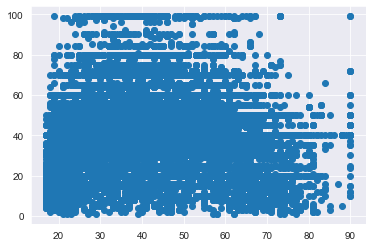

In [92]:
plt.scatter(balanced_df.age, balanced_df['hours-per-week'])

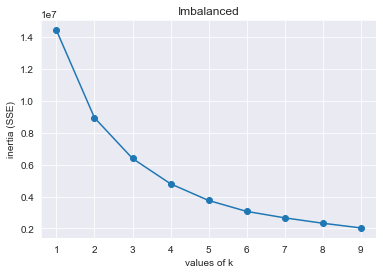

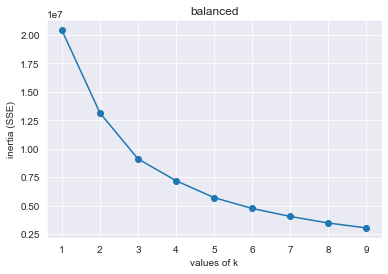

In [126]:
#finding the elbow graph
inertias = []
X = data[["age"]]
y = data["hours-per-week"]
X_train, X_test, y_train, y_test = model_selection.train_test_split(
             X, y, test_size = 0.2, random_state=42)
for k in range(1, 10):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(data[['age','hours-per-week']])
    inertias.append(kmeans.inertia_)
    

plt.plot(range(1, 10), inertias, 'o-')
plt.xlabel('values of k')
plt.ylabel('inertia (SSE)')
plt.title("Imbalanced")
plt.show()


#balanced
binertias = []
X = balanced_df[["age"]]
y = balanced_df["hours-per-week"]
X_train, X_test, y_train, y_test = model_selection.train_test_split(
             X, y, test_size = 0.2, random_state=42)
for k in range(1, 10):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(balanced_df[['age','hours-per-week']])
    binertias.append(kmeans.inertia_)
    

plt.plot(range(1, 10), binertias, 'o-')
plt.xlabel('values of k')
plt.ylabel('inertia (SSE)')
plt.title("balanced")
plt.show()

In [100]:
#new dataframe that has the column named "cluster" which will show which group cluster it belongs to
data['cluster'] = k_means.labels_
#data['cluster'] = predict_y
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income-binary,cluster
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,White,Male,2174,0,40,United-States,<=50K,0,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,White,Male,0,0,13,United-States,<=50K,0,2
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,White,Male,0,0,40,United-States,<=50K,0,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Black,Male,0,0,40,United-States,<=50K,0,2
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Black,Female,0,0,40,Cuba,<=50K,0,1


#### Graph with Cluster

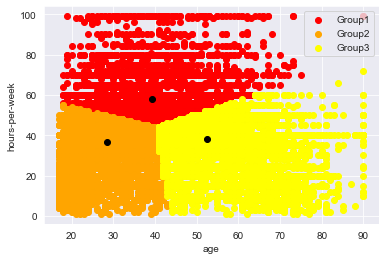

In [101]:
#assigning the three clusters into groups
dataCluster1 = data[data.cluster == 0]
dataCluster2 = data[data.cluster == 1]
dataCluster3 = data[data.cluster == 2]
#dataCluster4 = data[data.cluster == 3]



#graph the 3 clusters with their group
plt.scatter(dataCluster1.age,dataCluster1['hours-per-week'], color = 'red', label = "Group1")
plt.scatter(dataCluster2.age,dataCluster2['hours-per-week'], color = 'orange',label = "Group2")
plt.scatter(dataCluster3.age,dataCluster3['hours-per-week'], color = 'yellow', label = "Group3")
#plt.scatter(dataCluster4['hours-per-week'],dataCluster4.age, color = 'black')
centers = k_means.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c = 'black')

#, c = data['cluster']

plt.xlabel('age')
plt.ylabel('hours-per-week')
#plt.legend([dataCluster1, dataCluster2, dataCluster3], ["hours per week","hours per-week","hours-per week"])
plt.legend(loc="upper right")
#plt.show()

#### Explanation:
We decided to find the Kmeans in terms of age and hours per week. Comparing the original graph with the new graph with clusters, we can see that there are 3 clusters in regards to hours per week. The first cluster, cluster 0, is shown as the red group1. The second cluster, cluster 1, is shown as the orange group2. Finally the third cluster, cluster 2, is shown as the yellow group3. Each cluster has a black dot which are the centers for each clusters.

### kNN

In [37]:
X = data[["age", "education-num","hours-per-week"]]
y = data["income"]
n=100
knnList = []

X_train, X_test, y_train, y_test = model_selection.train_test_split(
             X, y, test_size = 0.2, random_state=42)

for k in range(1,n):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    knnList.append(knn.score(X_test, y_test))

fig = px.line( x=range(1,n), y=knnList, title='Score of KNN for k')
fig.show()

In [116]:
X = balanced_df[["age", "education-num","hours-per-week"]]
y = balanced_df["income"]
n=100
bknnList = []

X_train, X_test, y_train, y_test = model_selection.train_test_split(
             X, y, test_size = 0.2, random_state=42)

for k in range(1,n):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    bknnList.append(knn.score(X_test, y_test))

bfig = px.line( x=range(1,n), y=bknnList, title='(Balanced) Score of KNN for k')
bfig.show()

## Contributions
